

*  *Approach the data and libraries*
  *Load the data and libraries
   *Data Preparation and Transformation
   *Visualization
   Analysis
         ^Uni-variate
         ^Bi-variate
         ^Multi_variate
              &Supervised
                   Classification Y is discrete(0/1)
                   Regression:Y is continuous
              &Unsupervised

*   




Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

Load the data


In [ ]:
train=pd.read_csv('/content/train_v9rqX0R (4).csv')
test=pd.read_csv('/content/test_AbJTz2l (4).csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory data analysis(univariate and bivariate)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1.**Item Weight**
* Continuous variable
* Normal distribution(we get a bell shaped curve)
* There is no skew






<ipython-input-52-4c3c4a420be4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Weight'],kde= True)


<Axes: xlabel='Item_Weight', ylabel='Density'>

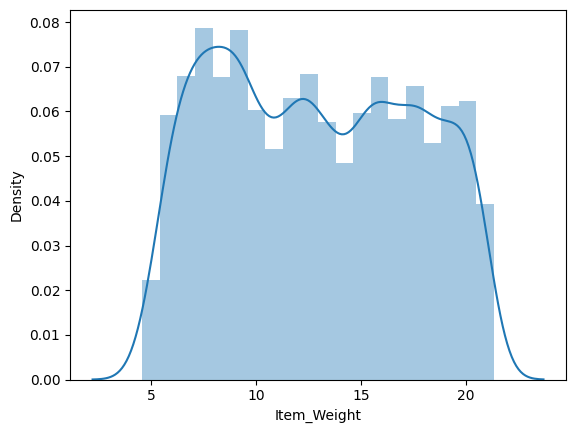

In [ ]:
sns.distplot(train['Item_Weight'],kde= True)

In [ ]:
train.skew()

<ipython-input-24-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

2.**Item Visibility**


*   Continuous variable
*   It has skew
*   It is exponentially shooting
*   It is heterogeneous





<ipython-input-25-8b45cd995c3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Visibility'],kde=True)


<Axes: xlabel='Item_Visibility', ylabel='Density'>

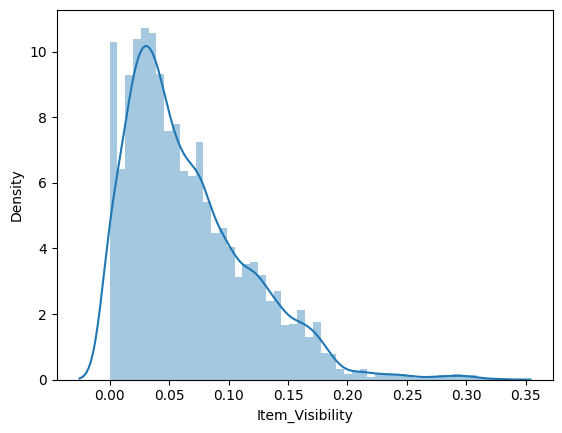

In [ ]:
sns.distplot(train['Item_Visibility'],kde=True)

<Axes: ylabel='Item_Visibility'>

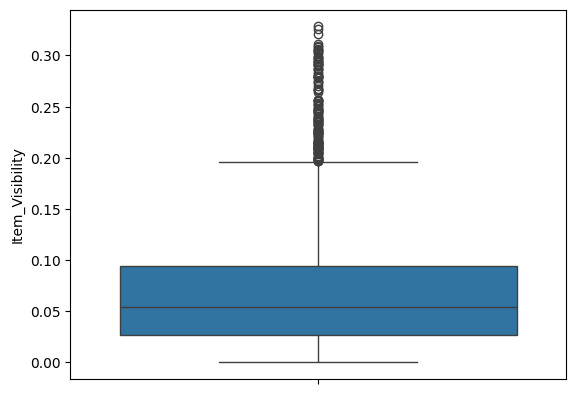

In [ ]:
sns.boxplot(train['Item_Visibility'])

3.**Item MRP**


*   Continuous variable




<ipython-input-27-656622103411>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

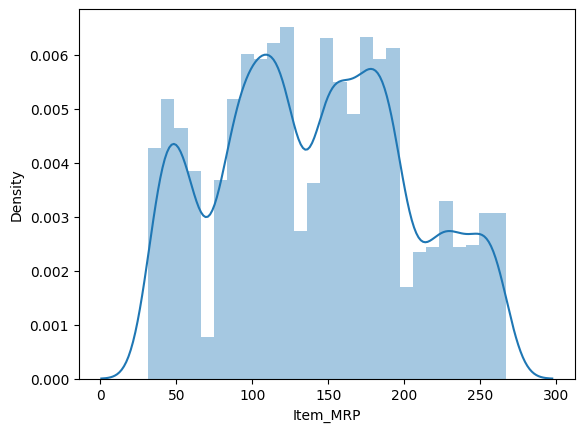

In [ ]:
sns.distplot(train['Item_MRP'])

4.Item outlet sales


*  Continuous variable




<ipython-input-28-c6175e048210>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'],kde=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

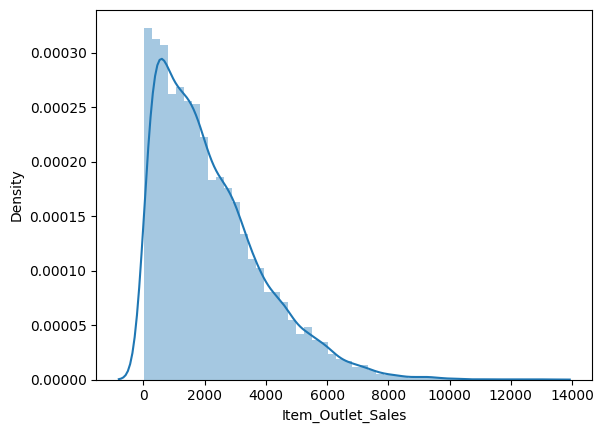

In [ ]:
sns.distplot(train['Item_Outlet_Sales'],kde=True)

5.**Item Fat Content**
# * Categorical variable   
*  We have data inconsistencies
*  We have LowFat,LF,lowfat



<Axes: >

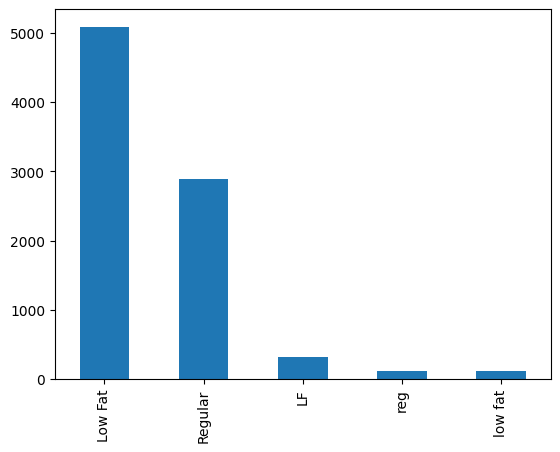

In [ ]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')

6.Item Type
* Categorical variable   
* Cardinality(no of levels a discrete variable has) is high
so it has high complexity



<Axes: >

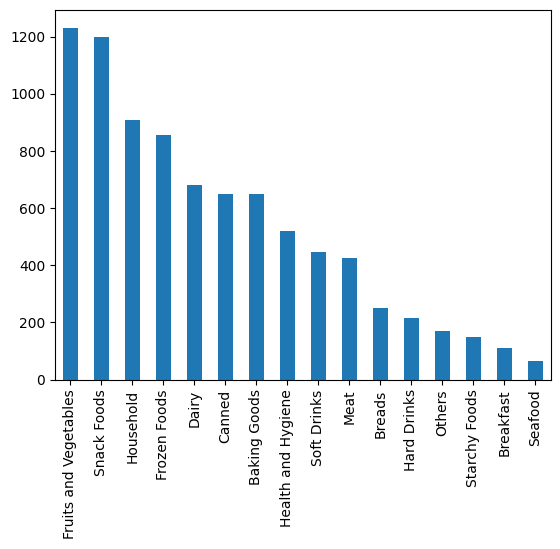

In [ ]:
train['Item_Type'].value_counts().plot(kind='bar')

7.**Outlet Identifier**
*   It has 10 categories
*  Categorical variable



<Axes: >

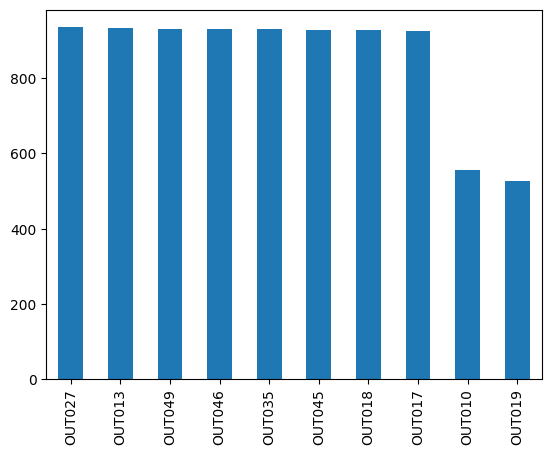

In [ ]:
train['Outlet_Identifier'].value_counts().plot(kind='bar')

8.**Outlet Establishment Year**

*  Continuous variable
*   List item



<ipython-input-16-f342b19e9375>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_Establishment_Year'],kde= True)


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

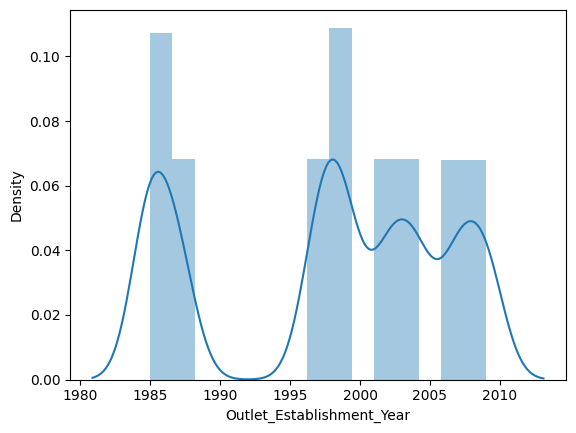

In [ ]:
sns.distplot(train['Outlet_Establishment_Year'],kde= True)

In [ ]:
train.skew()

<ipython-input-17-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

9.**Outlet size**

1.  Categorical (Nominal)variable





<Axes: >

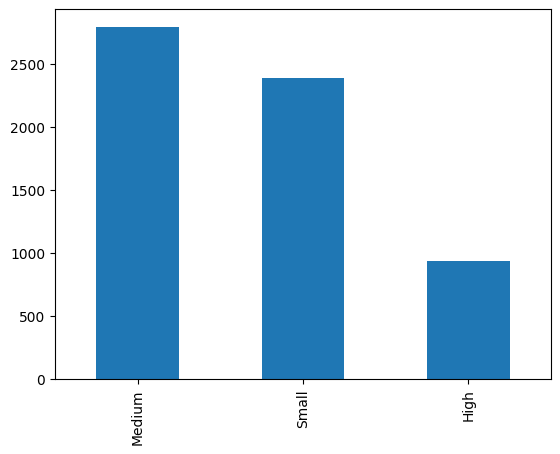

In [ ]:
train['Outlet_Size'].value_counts().plot(kind='bar')

10.Outlet Location Type

*   Categorical
# *   If tier1 represents ranking then it is an ordinal variable




<Axes: >

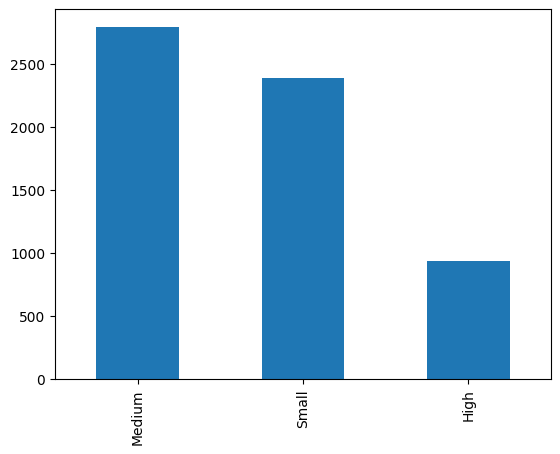

In [ ]:
train['Outlet_Size'].value_counts().plot(kind='bar')

11.**Outlet Type**


1. Categorical variable   



<Axes: >

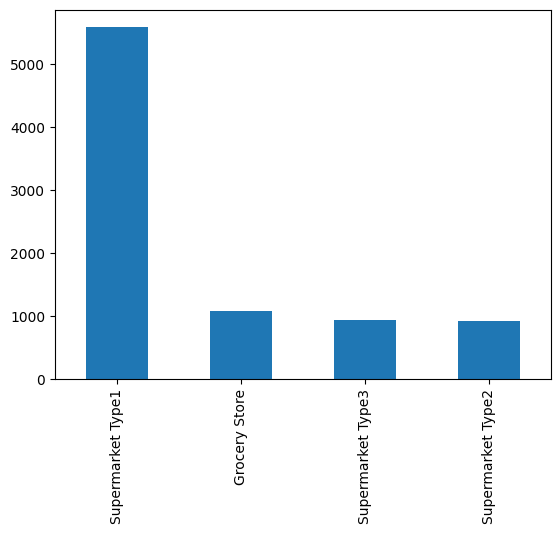

In [ ]:
train['Outlet_Type'].value_counts().plot(kind='bar')

Bivariate analysis


> For continuous variables we perform correlation





<ipython-input-30-79178845331e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

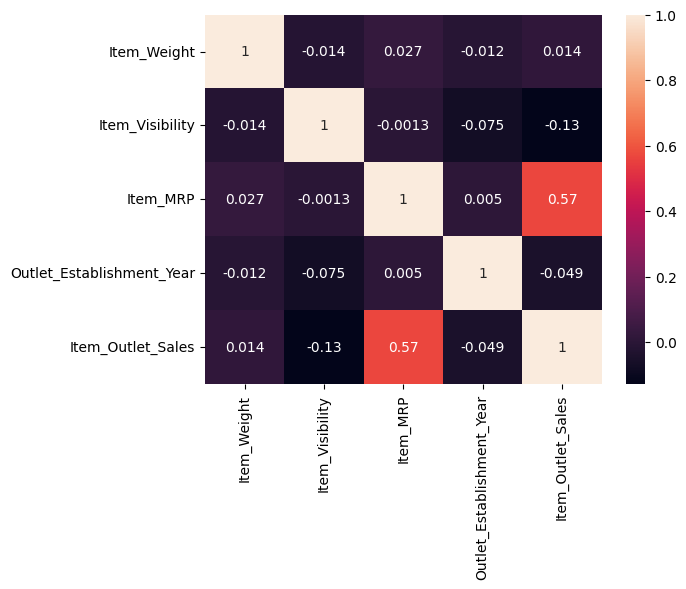

In [ ]:
sns.heatmap(train.corr(), annot=True)




Chi square test(Discrete variables)

In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Crosstab(converts the data into matrix)

1.   It represents as a table with rows and columns
2.   Computes a simple cross tabulation of two or more factors
Analysis

1.   Tier 3 have higher size

Causes

1.  Geniune
2.  sampling error






In order to remove sampling error we use chi squared test







In [ ]:
pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


Ruling out sampling error

1.Null Hypothesis :Outlet_Location_Type and Outlet_size are independent




2Alternate Hypothesis :OLT And OS are dependent

Other name for contingency table is cross tab

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def chi2_sq_test(var1,var2):
  contingency_table=pd.crosstab(var1,var2)
  _,pvalue,_,_=chi2_contingency(contingency_table)
  if pvalue <0.05:
    print("Accept the Alternate hypothesis",round(pvalue,2))
  else:
    print("Do Not Accept the Alternate Hypothesis",round(pvalue,2))
  return contingency_table

Outlet Size




Outlet_Location_Type

In [ ]:
chi2_sq_test(train['Outlet_Size'],train['Outlet_Location_Type'])

Accept the Alternate hypothesis 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


Item Type and ItemFatContent

In [ ]:
chi2_sq_test(train['Item_Type'],train['Item_Fat_Content'])

Accept the Alternate hypothesis 0.0


Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Type,,,,,
Baking Goods,20,301,306,8,13
Breads,8,126,108,6,3
Breakfast,2,39,67,0,2
Canned,17,314,297,10,11
Dairy,24,382,258,12,6
Frozen Foods,22,424,387,4,19
Fruits and Vegetables,39,580,577,11,25
Hard Drinks,8,199,0,7,0
Health and Hygiene,29,481,0,10,0


Outlet Identifier




Outlet Size

In [ ]:
chi2_sq_test(train['Outlet_Identifier'],train['Outlet_Size'])


Accept the Alternate hypothesis 0.0


Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT013,932,0,0
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT046,0,0,930
OUT049,0,930,0


Outlet Type






Outlet Size

In [ ]:
chi2_sq_test(train['Outlet_Type'],train['Outlet_Size'])


Accept the Alternate hypothesis 0.0


Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


Outlet Size



Item Fat Content

In [ ]:
chi2_sq_test(train['Outlet_Size'],train['Item_Fat_Content'])


Do Not Accept the Alternate Hypothesis 0.74


Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Outlet_Size,,,,,
High,32,556,313,18,13
Medium,105,1660,952,34,42
Small,96,1425,811,29,27


Item Type





Outlet_Location_Type

In [ ]:
chi2_sq_test(train['Item_Type'],train['Outlet_Location_Type'])


Do Not Accept the Alternate Hypothesis 1.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,185,211,252
Breads,67,84,100
Breakfast,33,32,45
Canned,177,222,250
Dairy,205,214,263
Frozen Foods,250,279,327
Fruits and Vegetables,337,399,496
Hard Drinks,58,72,84
Health and Hygiene,138,166,216


Item Type




Outlet Size

In [ ]:
chi2_sq_test(train['Item_Type'],train['Outlet_Size'])


Do Not Accept the Alternate Hypothesis 1.0


Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


Item Fat Content

outlet Identifier

In [ ]:
chi2_sq_test(train['Item_Fat_Content'],train['Outlet_Identifier'])


Do Not Accept the Alternate Hypothesis 0.56


Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,,,,,,,,,,
LF,26,32,31,42,19,37,38,26,39,26
Low Fat,328,556,550,547,314,553,559,570,552,560
Regular,187,313,317,312,177,324,314,309,320,316
low fat,5,18,13,9,13,15,9,13,7,10
reg,9,13,15,18,5,6,10,11,12,18


Item Fat Content




Outlet location Type

In [ ]:
chi2_sq_test(train['Item_Fat_Content'],train['Outlet_Location_Type'])


Do Not Accept the Alternate Hypothesis 0.94


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Fat_Content,,,
Low Fat,1540,1809,2168
Regular,848,976,1182


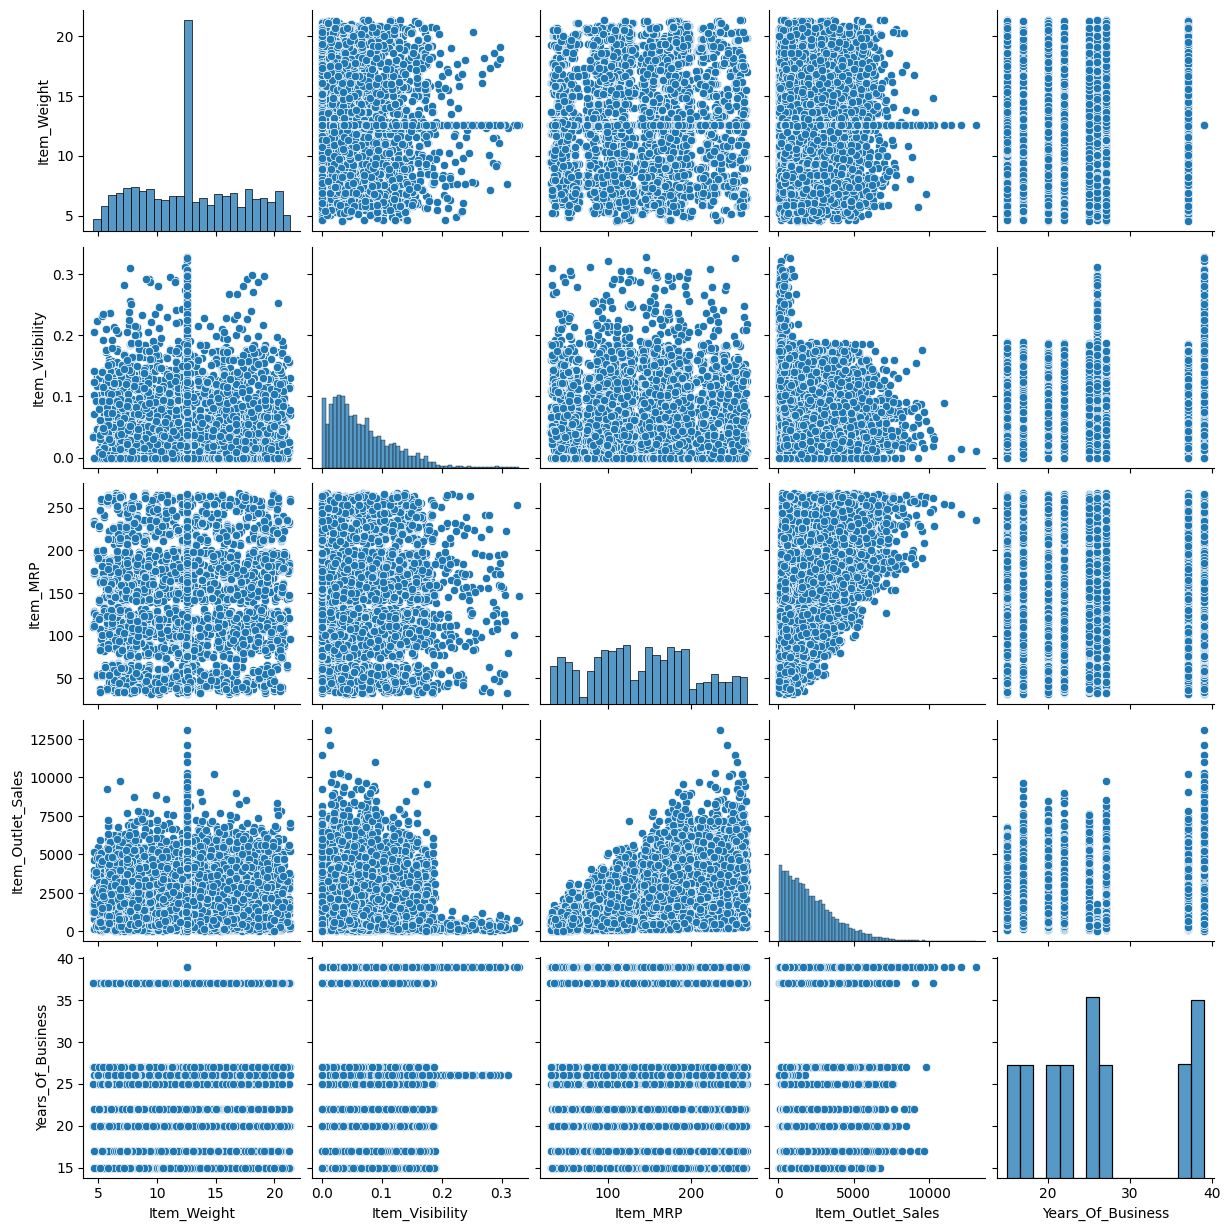

In [ ]:
sns.pairplot(train)

**Data Preparation**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Handling missing values

In [ ]:
def data_prep(data):
  #Impute Missing Values
  data['Item_Weight'] = np.where(data['Item_Weight'].isna(),
                                 data['Item_Weight'].median(skipna=True),data['Item_Weight'])
  data['Outlet_Size'] = np.where(data['Outlet_Size'].isna(),
                                 data['Outlet_Size'].mode(dropna = True)[0], data['Outlet_Size'])
  #Handle Inconsistent Values
  data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat', inplace = True)
  data['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
  data['Years_Of_Business'] = 2024 - data['Outlet_Establishment_Year']
  data.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis=1)
  return data

In [ ]:
data_prep(train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Of_Business
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,26
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,22
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,15


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Years_Of_Business     8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


Label Encoding

> Label encoding is good for ordinal data

> More than 4 dont apply label encoding

> Alternate to that is one hot encode


Example

> Lets have 2 classes
low fat and regular
Low fat =0
Regular=1

> Lets have 3 classes
low fat regular highfat
low fat=0
regular=1
high fat=2
It creates a order , so this is not the way it has to be done









**One hot Encoding**
> Dimensionality (Adds more columns (this is not advisable) )
> Sparsity problem



                 C1  C2  C3  C4
Low fat          1   0   0   0
Regular          0   1   0   0
High fat         0   0   1   0
extreme fat      0   0   0   1



Sparsity -In a column there can be few 1 and more no of 0
Sparsity is not great when used for computation




In [ ]:
train_enc=pd.get_dummies(train)

In [ ]:
train_enc.head()
#This is called a sparse matrix


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Of_Business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,15,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,26,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,37,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train_enc.info()
#It has made the data large(added more columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Years_Of_Business                8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

Divide the data into x and y

In [ ]:
y = train_enc['Item_Outlet_Sales']
x = train_enc.drop('Item_Outlet_Sales', axis=1)



In [ ]:
print(y.shape)
print(x.shape)

(8523,)
(8523, 32)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

#random state gets everyone the same random value
#if not we get different random value

In [ ]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Of_Business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,9.500,0.035206,171.3448,25,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
7757,18.000,0.047473,170.5422,22,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
764,17.600,0.076122,111.7202,27,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6867,8.325,0.029845,41.6138,22,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2716,12.850,0.137228,155.5630,27,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6818, 32)
(6818,)
(1705, 32)
(1705,)


### multi-varite model

linear regression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

1217.5862165082249


In [ ]:
print(lr.coef_)

[-1.73786670e+00 -4.66464698e+02  1.56624763e+01 -3.28994162e+01
 -2.23288378e+01  2.23288378e+01 -1.31693821e+01 -3.63334790e+01
  5.91638337e+01  1.36335115e+01 -1.01780812e+02 -2.49949718e+01
  3.38884834e+01 -2.45669492e+00  1.16618364e+00 -2.73139373e+01
 -1.15910604e+01 -5.93672520e+01  2.18349543e+02 -2.08138304e+01
 -4.13231044e+01  1.29429690e+01  5.34210407e+02 -2.95599068e+02
 -2.38611340e+02  1.95095320e+02  1.54227017e+01 -2.10518022e+02
 -1.64674691e+03 -1.24574556e+02 -3.70270288e+02  2.14159175e+03]


In [ ]:
for coef, feature in zip(lr.coef_, X_train.columns):
    print(f"{feature}: {coef:.4f}")  # Format to 4 decimal places

Item_Weight: -1.7379
Item_Visibility: -466.4647
Item_MRP: 15.6625
Years_Of_Business: -32.8994
Item_Fat_Content_Low Fat: -22.3288
Item_Fat_Content_Regular: 22.3288
Item_Type_Baking Goods: -13.1694
Item_Type_Breads: -36.3335
Item_Type_Breakfast: 59.1638
Item_Type_Canned: 13.6335
Item_Type_Dairy: -101.7808
Item_Type_Frozen Foods: -24.9950
Item_Type_Fruits and Vegetables: 33.8885
Item_Type_Hard Drinks: -2.4567
Item_Type_Health and Hygiene: 1.1662
Item_Type_Household: -27.3139
Item_Type_Meat: -11.5911
Item_Type_Others: -59.3673
Item_Type_Seafood: 218.3495
Item_Type_Snack Foods: -20.8138
Item_Type_Soft Drinks: -41.3231
Item_Type_Starchy Foods: 12.9430
Outlet_Size_High: 534.2104
Outlet_Size_Medium: -295.5991
Outlet_Size_Small: -238.6113
Outlet_Location_Type_Tier 1: 195.0953
Outlet_Location_Type_Tier 2: 15.4227
Outlet_Location_Type_Tier 3: -210.5180
Outlet_Type_Grocery Store: -1646.7469
Outlet_Type_Supermarket Type1: -124.5746
Outlet_Type_Supermarket Type2: -370.2703
Outlet_Type_Supermarket Ty

In [ ]:
y_hat_train=lr.predict(X_train)
y_hat_test=lr.predict(X_test)

In [ ]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [ ]:
y_hat_train

array([2876.9916689 , 2657.0923847 , 1855.66956328, ..., 3746.09218828,
       1997.01451142, 1574.7689201 ])

In [ ]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("the rmse of the model:",round(rmse_train,2))

the rmse of the model: 1142.08


In [ ]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("the rmse of the model:",round(rmse_test,2))

the rmse of the model: 1068.94


In [ ]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("the r2_score is:",round(r2_score_test,2))

the r2_score is: 0.58


In [ ]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("the r2_score is:",round(r2_score_train,2))

the r2_score is: 0.56
